In [6]:
!pip install transformers
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import transformers
from transformers import RobertaTokenizer, TFRobertaModel
transformers.logging.set_verbosity_error()
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Data Preprocessing


In [7]:
df_train = pd.read_csv("/content/drive/MyDrive/NLP_Final_Project/Poem_classification - train_data.csv")
df_test = pd.read_csv("/content/drive/MyDrive/NLP_Final_Project/Poem_classification - test_data.csv")

(array([239.,   0.,   0., 234.,   0.,   0., 141.,   0.,   0., 227.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

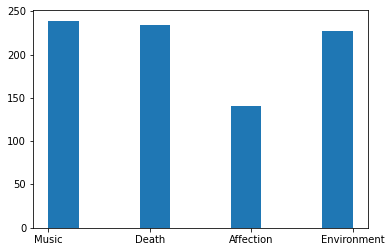

In [8]:
plt.hist(df_train["Genre"])

In [9]:
df_train = df_train.dropna(axis=0)
df_train.isnull().sum()

Genre    0
Poem     0
dtype: int64

In [10]:
df_test.isnull().sum()

Genre    0
Poem     0
dtype: int64

In [11]:
display(df_train)
display(df_test)

,Genre,Poem
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...
5,Music,"for Bob Marley, Bavaria, November 1980 Here i..."
...,...,...
836,Environment,Why make so much of fragmentary blue In here a...
837,Environment,"Woman, I wish I didn't know your name. What co..."
838,Environment,"Yonder to the kiosk, beside the creek, Paddle ..."
839,Environment,You come to fetch me from my work to-night Whe...


,Genre,Poem
0,Music,A woman walks by the bench I’m sitting onwith ...
1,Music,"Because I am a boy, the untouchability of beau..."
2,Music,"Because today we did not leave this world,We n..."
3,Music,"Big Bend has been here, been here. Shouldn’t i..."
4,Music,"I put shells there, along the lip of the road...."
...,...,...
145,Environment,"To pick a tulip from the garden, the red one. ..."
146,Environment,We are as clouds that veil the midnight moon; ...
147,Environment,"When pulled, the spider web took another form...."
148,Environment,Whose woods these are I think I know. His hous...


In [12]:
df_train.Genre.value_counts()


Music          238
Death          231
Environment    227
Affection      141
Name: Genre, dtype: int64

In [13]:
df_test.Genre.value_counts()

Affection      100
Environment     25
Death           13
Music           12
Name: Genre, dtype: int64

In [14]:
X_train = df_train['Poem']
X_train

1                    In the thick brushthey spend the...
2         Storms are generous.                       ...
3       —After Ana Mendieta Did you carry around the ...
4       for Aja Sherrard at 20The portent may itself ...
5       for Bob Marley, Bavaria, November 1980 Here i...
                             ...                        
836    Why make so much of fragmentary blue In here a...
837    Woman, I wish I didn't know your name. What co...
838    Yonder to the kiosk, beside the creek, Paddle ...
839    You come to fetch me from my work to-night Whe...
840    You see them through water and glass, (both li...
Name: Poem, Length: 837, dtype: object

In [15]:
y_train = df_train['Genre']
y_train

1            Music
2            Music
3            Music
4            Music
5            Music
          ...     
836    Environment
837    Environment
838    Environment
839    Environment
840    Environment
Name: Genre, Length: 837, dtype: object

In [16]:
X_test = df_test["Poem"]
X_test

0      A woman walks by the bench I’m sitting onwith ...
1      Because I am a boy, the untouchability of beau...
2      Because today we did not leave this world,We n...
3      Big Bend has been here, been here. Shouldn’t i...
4      I put shells there, along the lip of the road....
                             ...                        
145    To pick a tulip from the garden, the red one. ...
146    We are as clouds that veil the midnight moon; ...
147    When pulled, the spider web took another form....
148    Whose woods these are I think I know. His hous...
149    you can make the maples blazejust by stopping ...
Name: Poem, Length: 150, dtype: object

In [17]:
y_test = df_test['Genre']
y_test

0            Music
1            Music
2            Music
3            Music
4            Music
          ...     
145    Environment
146    Environment
147    Environment
148    Environment
149    Environment
Name: Genre, Length: 150, dtype: object

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer(stop_words='english', max_df=100) 

count_vector.fit(X_train)
X_train_count_vector = count_vector.transform(X_train)
X_test_count_vector = count_vector.transform(X_test)

X_train_count_vector.shape, X_test_count_vector.shape

((837, 8169), (150, 8169))

In [19]:
X_train_count_vector, X_test_count_vector

(<837x8169 sparse matrix of type '<class 'numpy.int64'>'
 	with 18814 stored elements in Compressed Sparse Row format>,
 <150x8169 sparse matrix of type '<class 'numpy.int64'>'
 	with 2522 stored elements in Compressed Sparse Row format>)

###Baseline Models

# Logistic Regression

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


lr_clf = LogisticRegression(max_iter=5000)

pipeline = Pipeline([('count_vector', CountVectorizer(stop_words='english', max_df=100)),
                    ('lr_clf', LogisticRegression())])

pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)

accuracy_score(y_test, pred)

0.34

In [26]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

   Affection       0.89      0.25      0.39       100
       Death       0.09      0.23      0.13        13
 Environment       0.33      0.56      0.41        25
       Music       0.19      0.75      0.31        12

    accuracy                           0.34       150
   macro avg       0.38      0.45      0.31       150
weighted avg       0.67      0.34      0.37       150



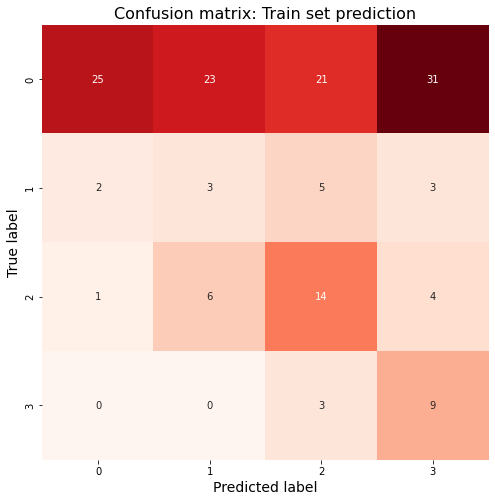

In [27]:
import seaborn as sns
from sklearn import metrics

fig,ax=plt.subplots(figsize=(8,8))
sns.heatmap(metrics.confusion_matrix(y_test, pred),annot=True,cbar=False,fmt='d',cmap='Reds')
ax.set_ylabel('True label',fontsize=14)
ax.set_xlabel('Predicted label',fontsize=14)
ax.set_title('Confusion matrix: Train set prediction',fontsize=16);

# SVM

In [29]:
from sklearn.svm import SVC

linearsvc = SVC()

pipeline = Pipeline([('count_vector', CountVectorizer(stop_words='english', max_df=100)),
                    ('linearsvc', SVC(kernel='linear'))])

pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)

accuracy_score(y_test, pred)

0.3333333333333333

In [31]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

   Affection       0.88      0.30      0.45       100
       Death       0.09      0.23      0.13        13
 Environment       0.27      0.40      0.32        25
       Music       0.15      0.58      0.24        12

    accuracy                           0.33       150
   macro avg       0.35      0.38      0.29       150
weighted avg       0.65      0.33      0.38       150



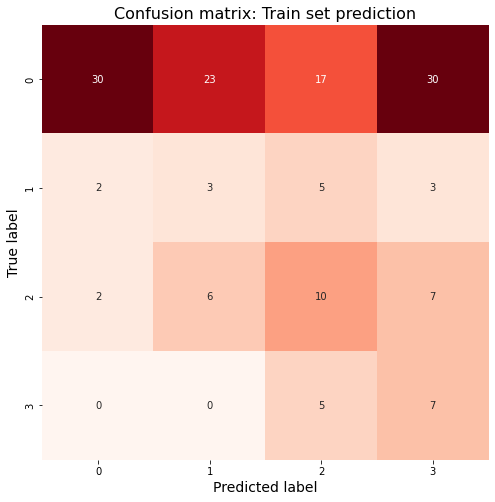

In [30]:
import seaborn as sns
from sklearn import metrics

fig,ax=plt.subplots(figsize=(8,8))
sns.heatmap(metrics.confusion_matrix(y_test, pred),annot=True,cbar=False,fmt='d',cmap='Reds')
ax.set_ylabel('True label',fontsize=14)
ax.set_xlabel('Predicted label',fontsize=14)
ax.set_title('Confusion matrix: Train set prediction',fontsize=16);

# MNB

In [32]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

pipeline = Pipeline([('count_vector', CountVectorizer(stop_words='english', max_df=100)),
                    ('mnb', MultinomialNB())])

pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)

accuracy_score(y_test, pred)

0.2866666666666667

In [33]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

   Affection       0.83      0.20      0.32       100
       Death       0.09      0.31      0.13        13
 Environment       0.30      0.56      0.39        25
       Music       0.16      0.42      0.23        12

    accuracy                           0.29       150
   macro avg       0.34      0.37      0.27       150
weighted avg       0.63      0.29      0.31       150



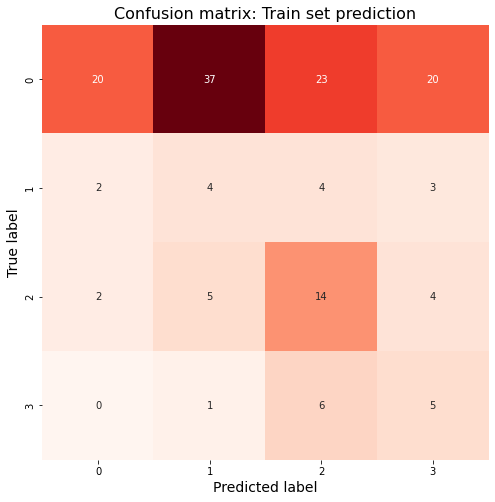

In [34]:
import seaborn as sns
from sklearn import metrics

fig,ax=plt.subplots(figsize=(8,8))
sns.heatmap(metrics.confusion_matrix(y_test, pred),annot=True,cbar=False,fmt='d',cmap='Reds')
ax.set_ylabel('True label',fontsize=14)
ax.set_xlabel('Predicted label',fontsize=14)
ax.set_title('Confusion matrix: Train set prediction',fontsize=16);

# MLP

In [35]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=5000, random_state=2211)

pipeline = Pipeline([('count_vector', CountVectorizer(stop_words='english', max_df=100)),
                    ('mlp', MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=5000, random_state=2211))])

pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)

accuracy_score(y_test, pred)

0.31333333333333335

In [37]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

   Affection       0.84      0.27      0.41       100
       Death       0.07      0.31      0.12        13
 Environment       0.33      0.52      0.40        25
       Music       0.12      0.25      0.17        12

    accuracy                           0.31       150
   macro avg       0.34      0.34      0.27       150
weighted avg       0.63      0.31      0.36       150



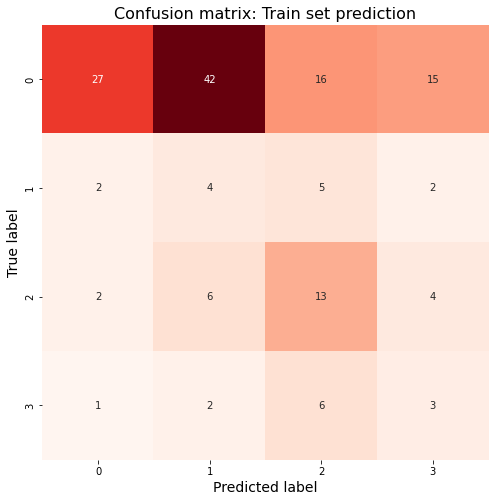

In [38]:
import seaborn as sns
from sklearn import metrics

fig,ax=plt.subplots(figsize=(8,8))
sns.heatmap(metrics.confusion_matrix(y_test, pred),annot=True,cbar=False,fmt='d',cmap='Reds')
ax.set_ylabel('True label',fontsize=14)
ax.set_xlabel('Predicted label',fontsize=14)
ax.set_title('Confusion matrix: Train set prediction',fontsize=16);

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# RoBERTa

In [ ]:
pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.8 MB/s 
     |████████████████████████████████| 5.8 MB 41.0 MB/s 
     |████████████████████████████████| 1.3 MB 52.2 MB/s 
     |████████████████████████████████| 182 kB 50.3 MB/s 
     |████████████████████████████████| 7.6 MB 44.6 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=e6e2b4b6daeef42a998824f0af6f4f8897f6c7be6f203ebedfcadd5615981f7e
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import transformers
from transformers import RobertaTokenizer, TFRobertaModel
transformers.logging.set_verbosity_error()
import re
pd.set_option("display.max_columns", None)

In [ ]:
# train_df=pd.read_csv('/content/drive/MyDrive/NLP_Final_Project/Poem_classification - train_data.csv')
# test_df=pd.read_csv('/content/drive/MyDrive/NLP_Final_Project/Poem_classification - test_data.csv')
display(train_df.info())
display(test_df.info())
train_df=train_df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Genre   841 non-null    object
 1   Poem    837 non-null    object
dtypes: object(2)
memory usage: 13.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Genre   150 non-null    object
 1   Poem    150 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


None

In [ ]:
Name0=train_df['Genre'].unique().tolist()
Name=sorted(Name0)
N=list(range(len(Name)))
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 
print(normal_mapping)
train_df['Genre']=train_df['Genre'].map(normal_mapping)
test_df['Genre']=test_df['Genre'].map(normal_mapping)

{'Affection': 0, 'Death': 1, 'Environment': 2, 'Music': 3}


In [ ]:
train_df['Poem'] = train_df['Poem'].replace(re.compile(r'[\n\r\t]'), ' ', regex=True)
test_df['Poem'] = test_df['Poem'].replace(re.compile(r'[\n\r\t]'), ' ', regex=True)

#Tokenize and create data

In [ ]:
tokenizer = RobertaTokenizer.from_pretrained("../input/roberta-base/")
max_len = 128

In [ ]:
def create_data(text):
    
    encoded = tokenizer.batch_encode_plus(
        text,
        add_special_tokens = True,
        max_length= max_len,
        padding='max_length',
        truncation=True,
        return_attention_mask=True)

    input_ids       = np.array(encoded["input_ids"], dtype="int32")
    attention_masks = np.array(encoded["attention_mask"], dtype="int32")

    return {"input_ids": input_ids, "attention_masks": attention_masks}

In [ ]:
train_data   = create_data(train_df['Poem'])

In [ ]:
train = []
train.append(train_df['Genre'].to_list())

#Build Model

In [ ]:
def build_model():
    
    model_ids  = Input(shape=(max_len, ), dtype = tf.int32)
    model_mask = Input(shape=(max_len, ), dtype = tf.int32)
    
    roberta_model = TFRobertaModel.from_pretrained("../input/roberta-base/")
    
    x = roberta_model(input_ids = model_ids, 
                      attention_mask = model_mask)       
    x = tf.keras.layers.GlobalAveragePooling1D()(x.last_hidden_state)    
    outputs = Dense(len(Name))(x)
    
    model = tf.keras.Model(inputs = [model_ids, model_mask], outputs = outputs)
    
    model.compile(
        optimizer = tf.keras.optimizers.Adam(),
        loss = "mse",
        metrics=["mse"])
    return model

In [ ]:
def scheduler(epoch):
    learning_rate = 2e-5
    if epoch == 0:
        return learning_rate * 0.05
    else:
        return learning_rate * (0.9**epoch)
    
callback_lr = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
def get_model(train_col) :
    
    model = build_model()
    model.fit((np.array(train_data['input_ids']),
               np.array(train_data['attention_masks'])),
        np.array(train_col).ravel(), 
        epochs = 5,
        shuffle=True,
        callbacks = [EarlyStopping(monitor='val_mse', patience=3, restore_best_weights=True), 
                     ModelCheckpoint('roberta_uspppm.h5', monitor='val_mse', 
                                     save_best_only=True, save_weights_only=True), 
                     callback_lr],                     
        batch_size = 16,
        validation_split=0.2 )
    
    return model

#Get Model


In [ ]:
%%time

target_cols = ['Genre']
models = {}

for i, col in enumerate(target_cols) :
            
    print (f"-------------- Model for {col} ---------------")
    model = get_model(train[i])
    models[i] = model

-------------- Model for Genre ---------------


2022-10-22 09:36:02.302601: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
42/42 [==============================] - 525s 12s/step - loss: 2.2788 - mse: 2.2788 - val_loss: 1.1580 - val_mse: 1.1580
Epoch 2/5
42/42 [==============================] - 492s 12s/step - loss: 1.3489 - mse: 1.3489 - val_loss: 0.4046 - val_mse: 0.4046
Epoch 3/5
42/42 [==============================] - 492s 12s/step - loss: 1.1598 - mse: 1.1598 - val_loss: 0.3491 - val_mse: 0.3491
Epoch 4/5
42/42 [==============================] - 493s 12s/step - loss: 1.0419 - mse: 1.0419 - val_loss: 0.5462 - val_mse: 0.5462
Epoch 5/5
42/42 [==============================] - 493s 12s/step - loss: 0.8196 - mse: 0.8196 - val_loss: 0.4458 - val_mse: 0.4458
CPU times: user 2h 32min 29s, sys: 57.9 s, total: 2h 33min 27s
Wall time: 42min 5s


#Submission

In [ ]:
test_data = create_data(test_df['Poem'])

In [ ]:
preds = []

for i in range(1) :
    pred = models[i].predict((np.array(test_data['input_ids']),
                              np.array(test_data['attention_masks'])))
    preds.append(np.argmax(pred,axis=1))    
    
trues = test_df['Genre']   

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(trues,preds[0],target_names=Name,digits=4))

              precision    recall  f1-score   support

   Affection     0.8276    0.2400    0.3721       100
       Death     0.1228    0.5385    0.2000        13
 Environment     0.1364    0.2400    0.1739        25
       Music     0.1500    0.2500    0.1875        12

    accuracy                         0.2667       150
   macro avg     0.3092    0.3171    0.2334       150
weighted avg     0.5971    0.2667    0.3094       150



# BERT LGBM

In [ ]:
!pip install transformers > /dev/null

In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import os
import torch
import random
import matplotlib.pyplot as plt
import transformers
from transformers import BertTokenizer
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
#from xgboost import XGBRegressor
import lightgbm as lgb
from tqdm import tqdm
tqdm.pandas()

In [ ]:
train = pd.read_csv('../input/poem-classification-nlp/Poem_classification - train_data.csv')
test = pd.read_csv('../input/poem-classification-nlp/Poem_classification - test_data.csv')
display(train)
display(test)
data=pd.concat([train,test],axis=0)
display(data.info())
data=data.dropna()

,Genre,Poem
0,Music,NaN
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...
...,...,...
836,Environment,Why make so much of fragmentary blue In here a...
837,Environment,"Woman, I wish I didn't know your name. What co..."
838,Environment,"Yonder to the kiosk, beside the creek, Paddle ..."
839,Environment,You come to fetch me from my work to-night Whe...


,Genre,Poem
0,Music,A woman walks by the bench I’m sitting onwith ...
1,Music,"Because I am a boy, the untouchability of beau..."
2,Music,"Because today we did not leave this world,We n..."
3,Music,"Big Bend has been here, been here. Shouldn’t i..."
4,Music,"I put shells there, along the lip of the road...."
...,...,...
145,Environment,"To pick a tulip from the garden, the red one. ..."
146,Environment,We are as clouds that veil the midnight moon; ...
147,Environment,"When pulled, the spider web took another form...."
148,Environment,Whose woods these are I think I know. His hous...


<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Genre   991 non-null    object
 1   Poem    987 non-null    object
dtypes: object(2)
memory usage: 23.2+ KB


None

In [ ]:
print(data['Genre'].value_counts())
Name0=data['Genre'].unique().tolist()
Name=sorted(Name0)
N=list(range(len(Name)))
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 
data['Genre']=data['Genre'].map(normal_mapping)

Environment    252
Music          250
Death          244
Affection      241
Name: Genre, dtype: int64


In [ ]:
class BertSequenceVectorizer:
    def __init__(self):
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        #self.model_name = '../input/bert-base-uncased'  # Inet-not-connect
        self.model_name = 'bert-base-uncased'          # Inet-connect
        self.tokenizer = BertTokenizer.from_pretrained(self.model_name)
        self.bert_model = transformers.BertModel.from_pretrained(self.model_name)
        self.bert_model = self.bert_model.to(self.device)
        self.max_len = 128

    def vectorize(self, sentence : str) -> np.array:
        inp = self.tokenizer.encode(sentence)
        len_inp = len(inp)

        if len_inp >= self.max_len:
            inputs = inp[:self.max_len]
            masks = [1] * self.max_len
        else:
            inputs = inp + [0] * (self.max_len - len_inp)
            masks = [1] * len_inp + [0] * (self.max_len - len_inp)

        inputs_tensor = torch.tensor([inputs], dtype=torch.long).to(self.device)
        masks_tensor = torch.tensor([masks], dtype=torch.long).to(self.device)

        bert_out = self.bert_model(inputs_tensor, masks_tensor)
        seq_out, pooled_out = bert_out['last_hidden_state'], bert_out['pooler_output']

        if torch.cuda.is_available():    
            return seq_out[0][0].cpu().detach().numpy()
        else:
            return seq_out[0][0].detach().numpy()

In [ ]:
BSV = BertSequenceVectorizer()
data['Poem_bert']=data['Poem'].progress_apply(lambda x: BSV.vectorize(x))
display(data[0:2])

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 987/987 [04:05<00:00,  4.02it/s]


,Genre,Poem,Poem_bert
1,3,In the thick brushthey spend the...,"[-0.19468375, 0.42541653, -0.2695186, -0.47039..."
2,3,Storms are generous. ...,"[-0.012234289, -0.33519086, -0.22740498, 0.057..."


In [ ]:
review=[]
for item in data['Poem_bert']:
    review+=[item]

dataX0=pd.DataFrame(review)
dataY=data['Genre']
print(dataX0.shape)
print(dataY.shape)

(987, 768)
(987,)


In [ ]:
n=len(data)
N=list(range(n))
random.shuffle(N)

In [ ]:
trainX0 = dataX0.iloc[0:len(train)].reset_index(drop=True)
trainY = dataY.iloc[0:len(train)].reset_index(drop=True)
testX0 = dataX0.iloc[len(train):].reset_index(drop=True)
testY = dataY.iloc[len(train):].reset_index(drop=True)
print(trainX0.shape)
print(testX0.shape)

(841, 768)
(146, 768)


In [ ]:
trainX = trainX0.iloc[:,0:200]
testX = testX0.iloc[:,0:200]
X = np.array(trainX)
y = np.array(trainY)

In [ ]:
clf = lgb.LGBMRegressor(max_depth=3,n_estimators=1000,learning_rate=0.01)
ss = ShuffleSplit(n_splits=5,train_size=0.8,test_size=0.2,random_state=0) 

In [ ]:
for train_index, test_index in ss.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    clf.fit(X_train, Y_train) 
    print(clf.score(X_test, Y_test))

0.03282836190744054
0.06638856520171432
0.039941082669343486
0.04041640608201991
-0.03153331521771863


In [ ]:
y_pred = clf.predict(testX)

In [ ]:
PRED=[]
for pred in y_pred:
    PRED+=[int(round(pred,0))]  
ANS=list(testY)
print(PRED[0:5])
print(ANS[0:5])

[1, 1, 2, 2, 2]
[3, 3, 3, 3, 3]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ANS,PRED,target_names=Name,digits=4))

              precision    recall  f1-score   support

   Affection     0.8333    0.0500    0.0943       100
       Death     0.0278    0.1538    0.0471        13
 Environment     0.1935    0.4800    0.2759        25
       Music     0.0000    0.0000    0.0000         8

    accuracy                         0.1301       146
   macro avg     0.2637    0.1710    0.1043       146
weighted avg     0.6064    0.1301    0.1160       146



This trial using BERT and LGTM could not distinguish genres of the poem. 

# LSTM

In [ ]:
!pip install keras-tuner --upgrade -q

In [ ]:
# standard library
import numpy as np
import pandas as pd
import warnings
from sklearn import preprocessing
warnings.simplefilter('ignore')
import random

# neural network library
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras import preprocessing
from keras_preprocessing.text import Tokenizer
import kerastuner as kt

#Load data

In [ ]:
# train_file = '../input/poem-classification-nlp/Poem_classification - train_data.csv'
# val_file = '../input/poem-classification-nlp/Poem_classification - test_data.csv'

train = pd.read_csv(train_file)
val = pd.read_csv(val_file)

# drop NULLs in training data
train.dropna(inplace=True)
train.reset_index(inplace=True, drop=True)

# stat 
print(f"training records: {train.shape[0]} and validation records: {val.shape[0]}")

training records: 837 and validation records: 150


In [ ]:
# params
max_features = int(sum([len(txt.split()) for txt in train['Poem']]) /2) # top n words to consider
maxlen = max([len(txt.split()) for txt in train['Poem']])  # first n words to consider

#Label encoding

In [ ]:
# label encoding
''' affection: 0, death: 1, environment: 2, music: 3 '''
label_encoder = preprocessing.LabelEncoder()
train['Genre_Code']= label_encoder.fit_transform(train['Genre'])
val['Genre_Code']= label_encoder.fit_transform(val['Genre'])

#Preprocessing data

In [ ]:
tokenizer = Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')

# training data
tokenizer.fit_on_texts(train['Poem'])
x_train = np.array(tokenizer.texts_to_sequences(train['Poem']))
y_train = np.array(train['Genre_Code'])

# validation data
tokenizer.fit_on_texts(val['Poem'])
x_val = np.array(tokenizer.texts_to_sequences(val['Poem']))
y_val = np.array(val['Genre_Code'])

x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)

## Build & tune the model

In [ ]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
# model.summary()

2022-10-05 22:36:24.904824: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-05 22:36:25.004922: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-05 22:36:25.005667: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-05 22:36:25.007820: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

### Hyperparameter tuning the base model

In [ ]:
def build_model(hp):
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)

  inputs = keras.Input(shape=(None,), dtype="int32")
  x = layers.Embedding(max_features, hp_units)(inputs)
  x = layers.Bidirectional(layers.LSTM(hp_units, return_sequences=True))(x)
  x = layers.Bidirectional(layers.LSTM(hp_units))(x)
  outputs = layers.Dense(1, activation="sigmoid")(x)
  model = keras.Model(inputs, outputs)

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])
  return model

In [ ]:
# Instantiate the tuner
tuner = kt.Hyperband(
                      build_model, # the hypermodel
                      objective='val_accuracy', # objective to optimize
                      max_epochs=10,
                      factor=3, # factor which you have seen above 
                    )

In [ ]:
# start the search and get the best model
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
tuner.search(x_train, y_train, epochs=10, validation_data=(x_val, y_val), callbacks=[stop_early])
best_param = tuner.get_best_hyperparameters()[0]

Trial 30 Complete [00h 00m 14s]
val_accuracy: 0.6666666865348816

Best val_accuracy So Far: 0.6666666865348816
Total elapsed time: 00h 05m 24s


In [ ]:
print("best parameters are:\n",best_param.values)

best parameters are:
 {'units': 32, 'learning_rate': 0.001, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 2, 'tuner/round': 0}


## Build model with optimal parameters

In [ ]:
def get_lr(lr):
  if lr == 0.01:
    return 1e-2
  elif lr == 0.001:
    return 1e-3
  elif lr == 0.0001:
    return  1e-4

In [ ]:
# params for optimization
unit = best_param.values['units']
epoch = best_param.values['tuner/epochs']
size = 32
lr = get_lr(best_param.values['learning_rate'])

In [ ]:
# updating the base model
inputs = keras.Input(shape=(None,), dtype="int32")
x = layers.Embedding(max_features, unit)(inputs)
x = layers.Bidirectional(layers.LSTM(unit, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(unit))(x)
# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
# model.summary()

In [ ]:
# compiling & fitting the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss=keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=size, epochs=epoch, validation_data=(x_val, y_val))

Epoch 1/2
27/27 [==============================] - 6s 56ms/step - loss: nan - accuracy: 0.1697 - val_loss: nan - val_accuracy: 0.6667
Epoch 2/2
27/27 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.1685 - val_loss: nan - val_accuracy: 0.6667


In [ ]:
acc = "{:.2f}".format(history.history.get('val_accuracy')[0])
print(f"Model's Optimized Accuracy is: {acc}")

Model's Optimized Accuracy is: 0.67


# Neural Nets

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np

In [ ]:
# train = pd.read_csv('../input/poem-classification-nlp/Poem_classification - train_data.csv')
# test = pd.read_csv('../input/poem-classification-nlp/Poem_classification - test_data.csv')
data=pd.concat([train,test],axis=0)
data=data.dropna()

In [ ]:
data = data.replace({'Environment':0,'Music':1,'Death':2,'Affection':3})

In [ ]:
sentences = data['Poem']
labels = data['Genre']
sentences = np.array(sentences)
labels = np.array(labels)
sentences.shape,labels.shape

((987,), (987,))

In [ ]:
training_sentences = sentences[0:901]
testing_sentences = sentences[901:]
training_labels = labels[0:901]
testing_labels = labels[901:]

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=200, padding='post', truncating='post')

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=200, padding='post', truncating='post')

In [ ]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(10000,16,input_length=200))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dense(25,activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='softmax'))
opt = tf.keras.optimizers.Adam()
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

2022-10-03 04:14:46.886886: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 04:14:46.977522: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 04:14:46.978312: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 04:14:46.979467: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                850       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 104       
Total params: 162,229
Trainable params: 162,229
Non-trainable params: 0
__________________________________________________

In [ ]:
num_epochs = 100
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/100


2022-10-03 04:14:49.784600: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


29/29 - 2s - loss: 1.3856 - accuracy: 0.2708 - val_loss: 1.4107 - val_accuracy: 0.0000e+00
Epoch 2/100
29/29 - 0s - loss: 1.3825 - accuracy: 0.2775 - val_loss: 1.4488 - val_accuracy: 0.0000e+00
Epoch 3/100
29/29 - 0s - loss: 1.3797 - accuracy: 0.2863 - val_loss: 1.4854 - val_accuracy: 0.0000e+00
Epoch 4/100
29/29 - 0s - loss: 1.3771 - accuracy: 0.2775 - val_loss: 1.5233 - val_accuracy: 0.0000e+00
Epoch 5/100
29/29 - 0s - loss: 1.3737 - accuracy: 0.2775 - val_loss: 1.5571 - val_accuracy: 0.0000e+00
Epoch 6/100
29/29 - 0s - loss: 1.3680 - accuracy: 0.3651 - val_loss: 1.5263 - val_accuracy: 0.0000e+00
Epoch 7/100
29/29 - 0s - loss: 1.3531 - accuracy: 0.3885 - val_loss: 1.5503 - val_accuracy: 0.0116
Epoch 8/100
29/29 - 0s - loss: 1.3258 - accuracy: 0.4384 - val_loss: 1.5753 - val_accuracy: 0.0698
Epoch 9/100
29/29 - 0s - loss: 1.2753 - accuracy: 0.4839 - val_loss: 1.4878 - val_accuracy: 0.2209
Epoch 10/100
29/29 - 0s - loss: 1.1922 - accuracy: 0.4983 - val_loss: 1.5203 - val_accuracy: 0.18